# EQ Processing

In [1]:
import matplotlib.pyplot as plt
from os import listdir
from os.path import exists, isdir, isfile, join, basename, splitext


In [2]:
%matplotlib inline

In [3]:
folder = r'C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes'

directory_listing = listdir(folder)

asc_files = [file for file in directory_listing if file.endswith('asc')]

In [4]:
blah = 'ertr:   tywtr:ytwy:wyeryw'
blah.split(None, 1)

['ertr:', 'tywtr:ytwy:wyeryw']

In [5]:
blah = ' ertr: tywtr:ytwy:wyeryw '
blah.strip()

'ertr: tywtr:ytwy:wyeryw'

In [6]:
EQ_dict = {}
TH_dict = {}
RS_dict = {}
for asc in asc_files:
    # print(splitext(asc))
    asc_list = asc.strip().replace('.asc','').split('_')
    event = asc_list[0].strip()
    station = asc_list[1].strip()
    ev_st = f'{event}_{station}'
    direction = station = asc_list[-1].strip()
    th_dict = TH_dict.get(ev_st,{})
    rs_dict = RS_dict.get(ev_st,{})

    infile = join(folder,asc)
    outfile = join(folder, asc.replace('.asc', '.csv'))
    print(infile)
    print(outfile)
    print(exists(infile))
    asc_dict = {}
    th = []
    t = 0
    with open(infile, 'r') as asc_file:
        for line in asc_file:
            if len(line.strip()) == 0:
                pass
            elif ':' in line:
                key, value = line.split(':', 1)
                asc_dict[key] = value.strip()
            elif ' ' in line.strip():
                T, S = line.strip().split()
                th.append((T, S))
            else:
                samp_int = asc_dict.get('SAMPLING_INTERVAL_S', '').strip()
                dt = float(samp_int)
                if len(samp_int) > 0:
                    th.append((t, line.strip()))
                    t = round(t + dt, len(samp_int))
    data = [(float(x), float(y)) for x, y in th]
    if '_Acc_' in asc:
        asc_dict['RecType'] = 'Acc'
        asc_dict['xlabel'] = 'Time (s)'
        asc_dict['ylabel'] = 'Acceleration (cm/s^2)'
        th_dict['xlabel'] = 'Time (s)'
        th_dict['ylabel'] = 'Acceleration (cm/s^2)'
        th_dict[direction] = data
    elif '_ResSpecAcc_' in asc:
        asc_dict['RecType'] = 'Acc'
        asc_dict['xlabel'] = 'Period (s)'
        asc_dict['ylabel'] = 'Acceleration (cm/s^2)'
        rs_dict['xlabel'] = 'Period (s)'
        rs_dict['ylabel'] = 'Acceleration (cm/s^2)'
        rs_dict[direction] = data
    asc_dict['data'] = data
    EQ_dict[asc.strip().replace('.asc','')] = asc_dict.copy()

    with open(outfile, 'w') as csv_file:
        name = asc.replace('.asc','')
        csv_file.write(f'{name}\n')
        if 'Acc' in asc:
            csv_file.write(f'Time (s), Acceleration (cm/s^2)\n')
        elif 'ResSpecAcc' in asc:
            csv_file.write(f'Period (s), Acceleration (cm/s^2)\n')
        [csv_file.write(f'{x},{y}\n') for x, y in th]
    TH_dict[ev_st] = th_dict.copy()
    RS_dict[ev_st] = rs_dict.copy()



C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_Acc_E.asc
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_Acc_E.csv
True
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_Acc_N.asc
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_Acc_N.csv
True
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_Acc_U.asc
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_Acc_U.csv
True
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_ResSpecAcc_E.asc
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_ResSpecAcc_E.csv
True
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_ResSpecAcc_N.asc
C:\Users\andrew.mole\OneDrive - Arup\Projects\T-S-Quakes\20230206011732_4628_ap_ResSpecAcc_N.csv
True
C:\Users\andrew.mole\OneDrive - Arup\Projects\T

In [7]:
EQ_dict['20230206011732_4628_ap_Acc_E'].keys()

dict_keys(['EVENT_NAME', 'EVENT_ID', 'EVENT_DATE_YYYYMMDD', 'EVENT_TIME_HHMMSS', 'EVENT_LATITUDE_DEGREE', 'EVENT_LONGITUDE_DEGREE', 'EVENT_DEPTH_KM', 'HYPOCENTER_REFERENCE', 'MAGNITUDE_W', 'MAGNITUDE_W_REFERENCE', 'MAGNITUDE_L', 'MAGNITUDE_L_REFERENCE', 'FOCAL_MECHANISM', 'NETWORK', 'STATION_CODE', 'STATION_NAME', 'STATION_LATITUDE_DEGREE', 'STATION_LONGITUDE_DEGREE', 'STATION_ELEVATION_M', 'LOCATION', 'SENSOR_DEPTH_M', 'VS30_M/S', 'SITE_CLASSIFICATION_EC8', 'MORPHOLOGIC_CLASSIFICATION', 'EPICENTRAL_DISTANCE_KM', 'EARTHQUAKE_BACKAZIMUTH_DEGREE', 'DATE_TIME_FIRST_SAMPLE_YYYYMMDD_HHMMSS', 'DATE_TIME_FIRST_SAMPLE_PRECISION', 'SAMPLING_INTERVAL_S', 'NDATA', 'DURATION_S', 'STREAM', 'UNITS', 'INSTRUMENT', 'INSTRUMENT_ANALOG/DIGITAL', 'INSTRUMENTAL_FREQUENCY_HZ', 'INSTRUMENTAL_DAMPING', 'FULL_SCALE_G', 'N_BIT_DIGITAL_CONVERTER', 'PGA_CM/S^2', 'TIME_PGA_S', 'BASELINE_CORRECTION', 'FILTER_TYPE', 'FILTER_ORDER', 'LOW_CUT_FREQUENCY_HZ', 'HIGH_CUT_FREQUENCY_HZ', 'LATE/NORMAL_TRIGGERED', 'DATABASE_

In [10]:
TH_dict = {}
RS_dict = {}

for asc in asc_files:
    # print(splitext(asc))
    asc_list = asc.strip().replace('.asc','').split('_')
    event = asc_list[0].strip()
    station = asc_list[1].strip()
    ev_st = f'{event}_{station}'
    direction = station = asc_list[-1].strip()

    infile = join(folder, asc)
    # outfile = join(folder, asc.replace('.asc', '.csv'))
    # print(infile)
    # print(outfile)
    # print(exists(infile))
    
    if '_Acc_' in asc:
        print('Acc', asc)
        t = 0
        th = []
        th_dict = TH_dict.get(ev_st,{})
        th_dict['xlabel'] = 'Time (s)'
        th_dict['ylabel'] = 'Acceleration (cm/s^2)'
        with open(infile, 'r') as asc_file:
            for line in asc_file:
                if len(line.strip()) == 0:
                    pass
                elif ':' in line:
                    pass
                elif ' ' in line.strip():
                    pass
                else:
                    samp_int = asc_dict.get('SAMPLING_INTERVAL_S', '').strip()
                    dt = float(samp_int)
                    if len(samp_int) > 0:
                        th.append((t, line.strip()))
                        t = round(t + dt, len(samp_int))
        data = [(float(x), float(y)) for x, y in th]
        th_dict[direction] = data
        TH_dict[ev_st] = th_dict.copy()

    elif '_ResSpecAcc_' in asc:
        print('ResSpecAcc', asc)
        th = []
        rs_dict = RS_dict.get(ev_st,{})
        rs_dict['xlabel'] = 'Period (s)'
        rs_dict['ylabel'] = 'Acceleration (cm/s^2)'
        th = []
        
        with open(infile, 'r') as asc_file:
            for line in asc_file:
                if len(line.strip()) == 0:
                    pass
                elif ':' in line:
                    pass
                elif ' ' in line.strip():
                    T, S = line.strip().split()
                    th.append((T, S))
                
        data = [(float(x), float(y)) for x, y in th]
        rs_dict[direction] = data
        RS_dict[ev_st] = rs_dict.copy()


Acc 20230206011732_4628_ap_Acc_E.asc
Acc 20230206011732_4628_ap_Acc_N.asc
Acc 20230206011732_4628_ap_Acc_U.asc
ResSpecAcc 20230206011732_4628_ap_ResSpecAcc_E.asc
ResSpecAcc 20230206011732_4628_ap_ResSpecAcc_N.asc
ResSpecAcc 20230206011732_4628_ap_ResSpecAcc_U.asc
Acc 20230206102447_4628_ap_Acc_E.asc
Acc 20230206102447_4628_ap_Acc_N.asc
Acc 20230206102447_4628_ap_Acc_U.asc
ResSpecAcc 20230206102447_4628_ap_ResSpecAcc_E.asc
ResSpecAcc 20230206102447_4628_ap_ResSpecAcc_N.asc
ResSpecAcc 20230206102447_4628_ap_ResSpecAcc_U.asc


In [11]:
TH_dict.keys(), RS_dict.keys()

(dict_keys(['20230206011732_4628', '20230206102447_4628']),
 dict_keys(['20230206011732_4628', '20230206102447_4628']))

In [12]:
th_dict = TH_dict['20230206011732_4628']
rs_dict = RS_dict['20230206011732_4628']
print(th_dict.keys())
print(rs_dict.keys())

dict_keys(['xlabel', 'ylabel', 'E', 'N', 'U'])
dict_keys(['xlabel', 'ylabel', 'E', 'N', 'U'])


dict_keys(['xlabel', 'ylabel', 'E', 'N', 'U'])
dict_keys(['xlabel', 'ylabel', 'E', 'N', 'U'])
dict_keys(['xlabel', 'ylabel', 'E', 'N', 'U'])
dict_keys(['xlabel', 'ylabel', 'E', 'N', 'U'])


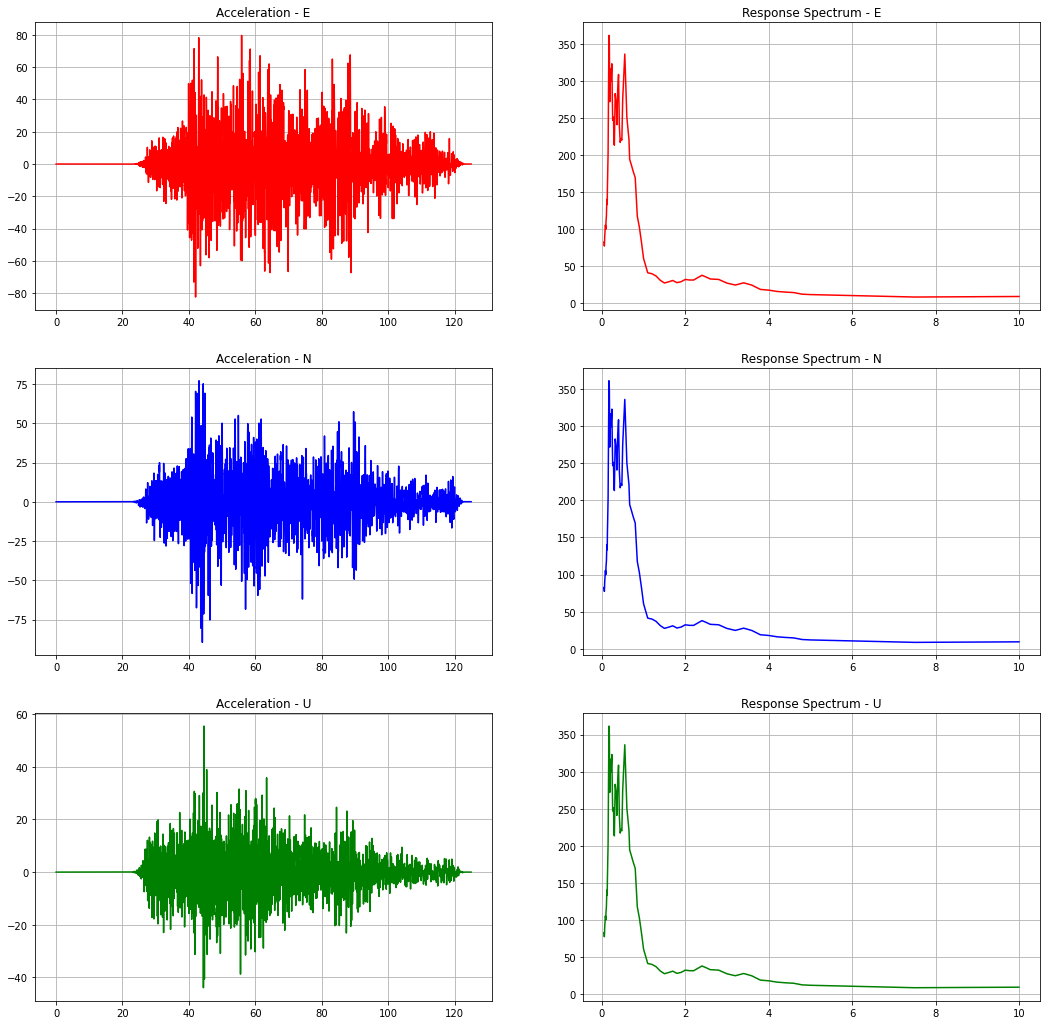

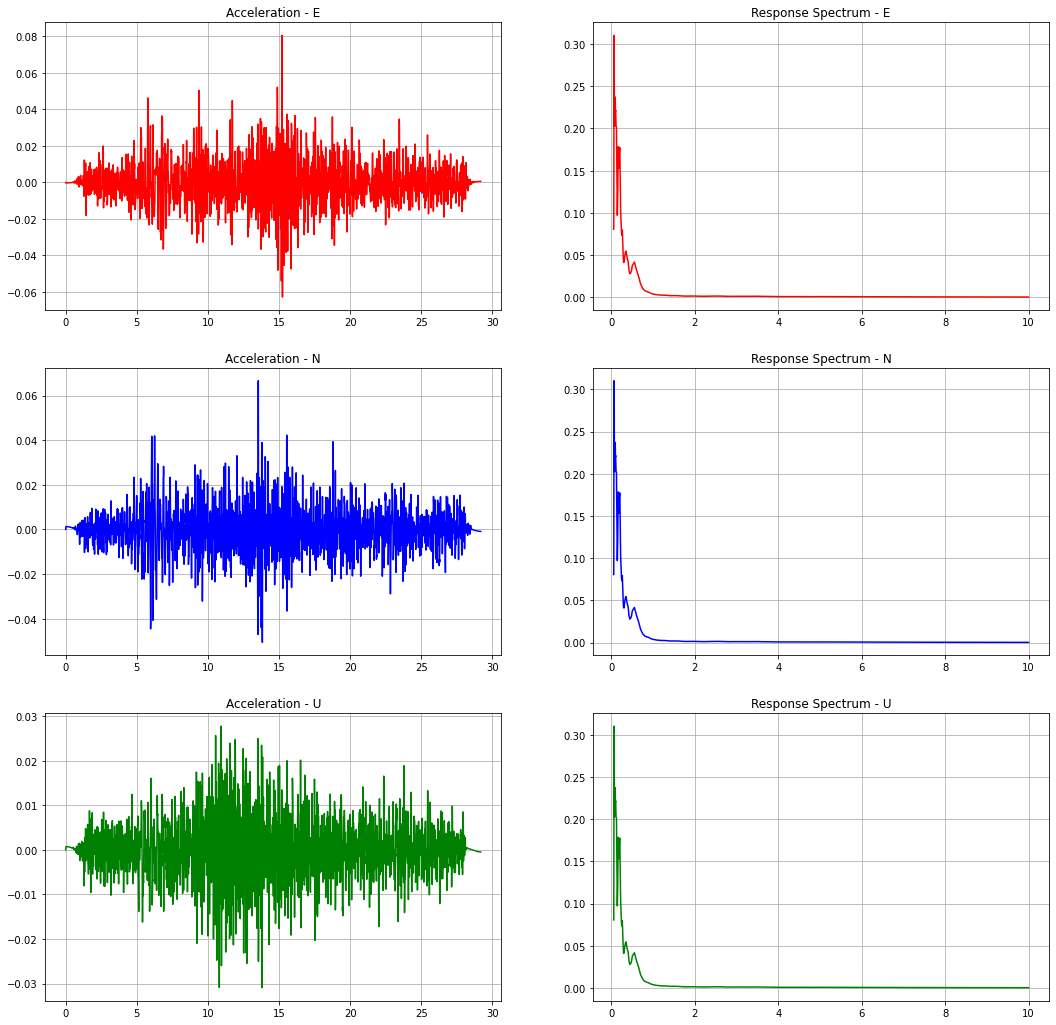

In [18]:
for eq in TH_dict.keys():
    th_dict = TH_dict[eq]
    rs_dict = RS_dict[eq]
    print(th_dict.keys())
    print(rs_dict.keys())

    fig, [[ax11, ax21], [ax12, ax22], [ax13, ax23]] = plt.subplots(nrows=3, ncols=2, figsize=(18,18)) # this is the overall Figure and the Axes object
    fig.set_label(eq)
    for ax in [ax11, ax21, ax12, ax22, ax13, ax23]:
        ax.grid(True)

    # Plotting the data...
    data_E = th_dict['E']
    tE, aE = zip(*data_E)
    ax11.plot(tE, aE, 'r-')
    ax11.set_title('Acceleration - E')
    data_E = rs_dict['E']
    tE, aE = zip(*data_E)
    ax21.plot(tE, aE, 'r-')
    ax21.set_title('Response Spectrum - E')
    
    # Plotting the data...
    data_E = th_dict['N']
    tE, aE = zip(*data_E)
    ax12.plot(tE, aE, 'b-')
    ax12.set_title('Acceleration - N')
    data_E = rs_dict['E']
    tE, aE = zip(*data_E)
    ax22.plot(tE, aE, 'b-')
    ax22.set_title('Response Spectrum - N')

    # Plotting the data...
    data_E = th_dict['U']
    tE, aE = zip(*data_E)
    ax13.plot(tE, aE, 'g-')
    ax13.set_title('Acceleration - U')
    data_E = rs_dict['E']
    tE, aE = zip(*data_E)
    ax23.plot(tE, aE, 'g-')
    ax23.set_title('Response Spectrum - U')

    fig.savefig(eq + '.svg')
    fig.savefig(eq + '.png')